# Pandas (3|3)

In [1]:
import pandas as pd

## Combining data
The most common ways to combine data using Pandas are the following:
- `merge`: Connect rows in dataframes based on one or multiple keys. This is very similary to the join operations in SQL (or other relational databases)
- `concat`: Stacks data along an axis (vertical or horizontal)

### Merge
Merging follows the following syntax.
- __What?__: What to merge
- __How?__: How to merge
- __On What?__: What to use to connect data

In [2]:
df1 = pd.DataFrame({
    "id": [1, 2, 3, 4, 5],
    "age": [24, 25, 30, 23, 25]
})

df2 = pd.DataFrame({
    "id": [1, 2, 3, 4, 5],
    "salary": [1800, 1250, 3000, 2000, 2500]
})

Merging on common key

In [3]:
df1.merge(df2, how="inner", on="id")

,id,age,salary
0,1,24,1800
1,2,25,1250
2,3,30,3000
3,4,23,2000
4,5,25,2500


Merging on different keys

In [4]:
df3 = pd.DataFrame({
    "identifier": [1, 2, 3, 4, 5],
    "location": ["lisbon", "lisbon", "oporto", "oporto", "lisbon"]
})

df1.merge(df3, how="inner", left_on="id", right_on="identifier")

,id,age,identifier,location
0,1,24,1,lisbon
1,2,25,2,lisbon
2,3,30,3,oporto
3,4,23,4,oporto
4,5,25,5,lisbon


Possible `how` (types of join) arguments:
- __left__: use only keys from left frame, similar to a SQL left outer join; preserve key order.
- __right__: use only keys from right frame, similar to a SQL right outer join; preserve key order.
- __outer__: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
- __inner__: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.
- __cross__: creates the cartesian product from both frames, preserves the order of the left keys.

In [5]:
df1 = pd.DataFrame({
    "id": [1, 2, 3, 4, 5, 10, 11, 12],
    "k1": [100, 200, 300, 400, 500, 1000, 1100, 1200]
})

df2 = pd.DataFrame({
    "id": [1, 2, 3, 4, 5, 6, 7, 8],
    "k2": ["A", "B", "C", "D", "E", "F", "G", "H"]
})

In [6]:
df1.merge(df2, how="inner", on="id")

,id,k1,k2
0,1,100,A
1,2,200,B
2,3,300,C
3,4,400,D
4,5,500,E


In [7]:
df1.merge(df2, how="left", on="id")

,id,k1,k2
0,1,100,A
1,2,200,B
2,3,300,C
3,4,400,D
4,5,500,E
5,10,1000,NaN
6,11,1100,NaN
7,12,1200,NaN


In [8]:
df1.merge(df2, how="right", on="id")

,id,k1,k2
0,1,100.0,A
1,2,200.0,B
2,3,300.0,C
3,4,400.0,D
4,5,500.0,E
5,6,NaN,F
6,7,NaN,G
7,8,NaN,H


In [9]:
df1.merge(df2, how="outer", on="id")

,id,k1,k2
0,1,100.0,A
1,2,200.0,B
2,3,300.0,C
3,4,400.0,D
4,5,500.0,E
5,10,1000.0,NaN
6,11,1100.0,NaN
7,12,1200.0,NaN
8,6,NaN,F
9,7,NaN,G


In [10]:
df1.merge(df2, how="cross") # all possible combinations

,id_x,k1,id_y,k2
0,1,100,1,A
1,1,100,2,B
2,1,100,3,C
3,1,100,4,D
4,1,100,5,E
...,...,...,...,...
59,12,1200,4,D
60,12,1200,5,E
61,12,1200,6,F
62,12,1200,7,G


What happens if you have duplicate key columns? They are repeated

In [11]:
df1 = pd.DataFrame({
    "id": [1, 1, 1, 2, 3],
})

df2 = pd.DataFrame({
    "id": [1, 2, 3, 4, 5],
    "salary": [1800, 1250, 3000, 2000, 2500]
})

In [12]:
df1.merge(df2, how="inner", on="id")

,id,salary
0,1,1800
1,1,1800
2,1,1800
3,2,1250
4,3,3000


### Concat

#### Vertical `axis=0`

Columns with same name are stacked

In [13]:
df1 = pd.DataFrame({
    "id": [1, 2, 3],
    "k1": ["A", "B", "C"]
})

df2 = pd.DataFrame({
    "id": [4, 5, 6],
    "k1": ["D", "E", "F"]
})

pd.concat([df1, df2], axis=0)

,id,k1
0,1,A
1,2,B
2,3,C
0,4,D
1,5,E
2,6,F


Columns with different name are filled with `NaN`, having no match

In [14]:
df1 = pd.DataFrame({
    "id": [1, 2, 3],
    "k1": ["A", "B", "C"]
})

df2 = pd.DataFrame({
    "id": [4, 5, 6],
    "k2": ["D", "E", "F"]
})

pd.concat([df1, df2], axis=0)

,id,k1,k2
0,1,A,NaN
1,2,B,NaN
2,3,C,NaN
0,4,NaN,D
1,5,NaN,E
2,6,NaN,F


#### Horizontal `axis=1`

In [15]:
df1 = pd.DataFrame({
    "id": [1, 2, 3],
    "k1": ["A", "B", "C"]
})

df2 = pd.DataFrame({
    "identifier": [4, 5, 6],
    "k2": ["D", "E", "F"]
})

pd.concat([df1, df2], axis=1)

,id,k1,identifier,k2
0,1,A,4,D
1,2,B,5,E
2,3,C,6,F


When axis=1, columns with same name will be duplicated

In [16]:
df1 = pd.DataFrame({
    "id": [1, 2, 3],
    "k1": ["A", "B", "C"]
})

df2 = pd.DataFrame({
    "identifier": [4, 5, 6],
    "k1": ["A", "B", "C"]
})

pd.concat([df1, df2], axis=1)

,id,k1,identifier,k1
0,1,A,4,A
1,2,B,5,B
2,3,C,6,C


## Group By

A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.
For groupby to work, you have to parse:
- Key column
- Aggregation function

In [17]:
df = pd.DataFrame({
    "category1": ["A", "B", "A", "A", "B", "C", "C", "B"],
    "category2": ["yes", "no", "no", "no", "yes", "yes", "yes", "no"],
    "k1": [11, 10, 8, 4, 6, 10, 12, 1],
    "k2": [2000, 1000, 2000, 3000, 1000, 1000, 5000, 1000]
})
df

,category1,category2,k1,k2
0,A,yes,11,2000
1,B,no,10,1000
2,A,no,8,2000
3,A,no,4,3000
4,B,yes,6,1000
5,C,yes,10,1000
6,C,yes,12,5000
7,B,no,1,1000


Extracting the mean value of the data, for each unique `category1` value (the key)

In [18]:
df.groupby("category1").mean()

,k1,k2
category1,,
A,7.666667,2333.333333
B,5.666667,1000.000000
C,11.000000,3000.000000


Instead, you can extract the aggregation result just for a specific column

In [19]:
df.groupby("category1")["k1"].mean()

category1
A     7.666667
B     5.666667
C    11.000000
Name: k1, dtype: float64

If you notice, on the previous cases, the key column will be set as the index of the new aggregated dataframe. You can avoid this by setting `as_index=False`, which will keep the key as a column. This is mostly useful for later visualization with Seaborn.

In [20]:
df.groupby("category1", as_index=False).mean()

,category1,k1,k2
0,A,7.666667,2333.333333
1,B,5.666667,1000.000000
2,C,11.000000,3000.000000


Some aggregation examples

In [21]:
df.groupby("category1").size()

category1
A    3
B    3
C    2
dtype: int64

In [22]:
df.groupby("category1").min()

,category2,k1,k2
category1,,,
A,no,4,2000
B,no,1,1000
C,yes,10,1000


In [23]:
df.groupby("category1").max()

,category2,k1,k2
category1,,,
A,yes,11,3000
B,yes,10,1000
C,yes,12,5000


In [24]:
df.groupby("category1").sum()

,k1,k2
category1,,
A,23,7000
B,17,3000
C,22,6000


Besides a unique key, you can use multiple keys. This creates a multi-index unless you set `as_index=False`

In [25]:
df.groupby(["category1", "category2"]).mean()

k1      k2
category1 category2              
A         no          6.0  2500.0
          yes        11.0  2000.0
B         no          5.5  1000.0
          yes         6.0  1000.0
C         yes        11.0  3000.0

In [26]:
df.groupby(["category1", "category2"], as_index=False).mean()

,category1,category2,k1,k2
0,A,no,6.0,2500.0
1,A,yes,11.0,2000.0
2,B,no,5.5,1000.0
3,B,yes,6.0,1000.0
4,C,yes,11.0,3000.0


If you have the need for different aggregation functions, depending on the column, you can use a dictionary to parse which functions to apply to each column.

In [27]:
df.groupby("category1").agg({"k1": ["min", "max"], "k2": ["sum", "mean", "std"]})

k1        k2                          
          min max   sum         mean          std
category1                                        
A           4  11  7000  2333.333333   577.350269
B           1  10  3000  1000.000000     0.000000
C          10  12  6000  3000.000000  2828.427125

## Sampling
Pandas allows you to sample data. This might be useful for when dealing with large datasets, and you want to prepare your pipeline of transformations, without having to wait long times for data to process.

In [28]:
df = pd.DataFrame({
    "name": ["bruce wayne", "alfred", "gordon", "penguin", "riddler", "joker"],
    "is_batman": ["batman", "not batman", "not batman", "not batman", "not batman", "not batman"]
})

You can specify the amount of data to sample by parsing a `frac` fraction of data to use

In [29]:
df.sample(frac=0.5)

,name,is_batman
0,bruce wayne,batman
3,penguin,not batman
4,riddler,not batman


What happens is, everytime you run the previous code, new results will be generated. This is because the chosen samples are random. You can avoid this by setting the random seed in `random_state` to a fixed number, allowing to replicate results

In [30]:
df.sample(frac=0.5, random_state=0)

,name,is_batman
5,joker,not batman
2,gordon,not batman
1,alfred,not batman


Here's an example with numpy to better understand what the random seed does

In [31]:
# Generating random int numbers between 1 and 500
import numpy as np

print("No seed:")
for _ in range(5):
    print(np.random.randint(1, 500))

print("With seed:")
for _ in range(5):
    np.random.seed(0)
    print(np.random.randint(1, 500))

No seed:
265
196
339
25
75
With seed:
173
173
173
173
173


## Datetime
Working with dates is not always and easy task. Pandas has a feature to better handle this type of data, acessible by having columns in the datetime format.

In [32]:
df = pd.DataFrame({
     "date": ["2021-01-01", "2022-05-02", "2022-12-24"],
     "value": [2, 3, 4]
})
df.head()

,date,value
0,2021-01-01,2
1,2022-05-02,3
2,2022-12-24,4


As you can see, usually, when reading or creating datasets from scratch, dates will be recognized by pandas as text/object data

In [33]:
df.dtypes

date     object
value     int64
dtype: object

To cast datetime information to its correct format, you can use: `pd.to_Datetime(<Series>)`

In [34]:
df["date"] = pd.to_datetime(df["date"])
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [35]:
df.head()

,date,value
0,2021-01-01,2
1,2022-05-02,3
2,2022-12-24,4


Sometimes, you may have to help pandas by specifying the correct date format. <br>
Check the documentation to help you with different formats: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [36]:
df = pd.DataFrame({
     "date": ["21-jan-01 10:30:00", "22-may-02 05:36:12", "22-dec-24 23:23:59"],
     "value": [2, 3, 4]
})
df

,date,value
0,21-jan-01 10:30:00,2
1,22-may-02 05:36:12,3
2,22-dec-24 23:23:59,4


In [37]:
df["date"] = pd.to_datetime(df["date"], format="%y-%b-%d %H:%M:%S")
df

,date,value
0,2021-01-01 10:30:00,2
1,2022-05-02 05:36:12,3
2,2022-12-24 23:23:59,4


Having the date in datetime format will allow you to access new modules and attributes, for example:

In [38]:
df["date"].dt.year

0    2021
1    2022
2    2022
Name: date, dtype: int64

In [39]:
df["date"].dt.month

0     1
1     5
2    12
Name: date, dtype: int64

In [40]:
df["date"].dt.day

0     1
1     2
2    24
Name: date, dtype: int64

In [41]:
df["date"].dt.hour

0    10
1     5
2    23
Name: date, dtype: int64

In [42]:
df["date"].dt.minute

0    30
1    36
2    23
Name: date, dtype: int64

In [43]:
df["date"].dt.second

0     0
1    12
2    59
Name: date, dtype: int64

In [44]:
df["date"].dt.isocalendar().week

0    53
1    18
2    51
Name: week, dtype: UInt32

In [45]:
df["date"].dt.dayofweek

0    4
1    0
2    5
Name: date, dtype: int64

In [46]:
df["date"].dt.is_leap_year

0    False
1    False
2    False
Name: date, dtype: bool

You can also do operations regarding time deltas (e.g. days since, difference in dates, date plus/minus days, ...)

In [47]:
df = pd.DataFrame({
     "date": ["2018-01-01", "2022-05-02", "2022-12-24"],
     "value": [2, 3, 4]
})
df

,date,value
0,2018-01-01,2
1,2022-05-02,3
2,2022-12-24,4


In [48]:
ref_date = "2022-03-24"

df["days_since_base_date"] = pd.to_datetime(ref_date) - pd.to_datetime(df["date"])
df.head()

,date,value,days_since_base_date
0,2018-01-01,2,1543 days
1,2022-05-02,3,-39 days
2,2022-12-24,4,-275 days


In [49]:
df["days_since_base_date"].dt.days

0    1543
1     -39
2    -275
Name: days_since_base_date, dtype: int64

In [50]:
# You can also use other libs to convert string to days or do timedeltas, e.g.
from datetime import datetime
print(datetime.strptime("2022-03-04", "%Y-%m-%d"))

2022-03-04 00:00:00


Adding or subtracting days from date

In [51]:
df = pd.DataFrame({
     "date": ["2018-01-01", "2022-05-02", "2022-12-24"],
     "value": [2, 3, 4]
})
df

,date,value
0,2018-01-01,2
1,2022-05-02,3
2,2022-12-24,4


In [52]:
pd.to_datetime(df["date"]) + pd.Timedelta(days=20)

0   2018-01-21
1   2022-05-22
2   2023-01-13
Name: date, dtype: datetime64[ns]

## Text
When dealing with text data, it is generally a good idea to normalize your text. Here are some examples on how to do that with Pandas

In [53]:
df = pd.DataFrame({
    "id": range(1, 8),
    "text": [
        "Hello World", 
        " hello world", 
        "hello world ", 
        "HELLO WORLD", 
        "      hello world", 
        "hello world     ",
        "hello         world"
        ]
})
df

,id,text
0,1,Hello World
1,2,hello world
2,3,hello world
3,4,HELLO WORLD
4,5,hello world
5,6,hello world
6,7,hello world


Getting the lenght of each sentence

In [54]:
df["text"].str.len()

0    11
1    12
2    12
3    11
4    17
5    16
6    19
Name: text, dtype: int64

Lower case all characters

In [55]:
df["text"].str.lower()

0            hello world
1            hello world
2           hello world 
3            hello world
4            hello world
5       hello world     
6    hello         world
Name: text, dtype: object

Upper case all characters

In [56]:
df["text"].str.upper()

0            HELLO WORLD
1            HELLO WORLD
2           HELLO WORLD 
3            HELLO WORLD
4            HELLO WORLD
5       HELLO WORLD     
6    HELLO         WORLD
Name: text, dtype: object

First character of each word uppercase

In [57]:
df["text"].str.title()

0            Hello World
1            Hello World
2           Hello World 
3            Hello World
4            Hello World
5       Hello World     
6    Hello         World
Name: text, dtype: object

Remove leading and trailing characters

In [58]:
df["text"].str.strip()

0            Hello World
1            hello world
2            hello world
3            HELLO WORLD
4            hello world
5            hello world
6    hello         world
Name: text, dtype: object

Remove leading characters

In [59]:
df["text"].str.lstrip()

0            Hello World
1            hello world
2           hello world 
3            HELLO WORLD
4            hello world
5       hello world     
6    hello         world
Name: text, dtype: object

Remove trailing characters

In [60]:
df["text"].str.rstrip()

0            Hello World
1            hello world
2            hello world
3            HELLO WORLD
4            hello world
5            hello world
6    hello         world
Name: text, dtype: object

Where text ends with a specific keyword

In [61]:
df["text"].str.endswith("world")

0    False
1     True
2    False
3    False
4     True
5    False
6     True
Name: text, dtype: bool

Where text starts with a specific keyword

In [62]:
df["text"].str.startswith("hello")

0    False
1    False
2     True
3    False
4    False
5     True
6     True
Name: text, dtype: bool

Replacing specific substrings in text

In [63]:
df["text"].str.replace("hello", "goodbye")

0              Hello World
1            goodbye world
2           goodbye world 
3              HELLO WORLD
4            goodbye world
5       goodbye world     
6    goodbye         world
Name: text, dtype: object

Splitting the text based on a specific delimiter (default blank space)

In [64]:
df["text"].str.split()

0    [Hello, World]
1    [hello, world]
2    [hello, world]
3    [HELLO, WORLD]
4    [hello, world]
5    [hello, world]
6    [hello, world]
Name: text, dtype: object

Example on how to remove multiple blank spaces and replace them by one

In [65]:
df["text"].str.split().apply(lambda sentence: " ".join(sentence))

0    Hello World
1    hello world
2    hello world
3    HELLO WORLD
4    hello world
5    hello world
6    hello world
Name: text, dtype: object

## [OPTIONAL] Pandas data viz

__This content is optional. We are going to have a dedicated data viz class where we are going to learn how to work with matplotlib and seaborn, which will allow you to make more powerful plots__

In [66]:
df = pd.DataFrame({
    "year": [2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "value": [10, 11, 13, 12, 14, 15, 17]
})
df

,year,value
0,2015,10
1,2016,11
2,2017,13
3,2018,12
4,2019,14
5,2020,15
6,2021,17


Just some examples of plots using pandas, for your curiosity:

<AxesSubplot:xlabel='year'>

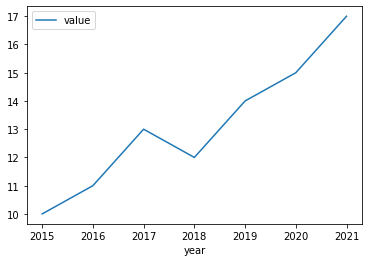

In [67]:
df.plot(
    x="year",
    y="value"
)

<AxesSubplot:xlabel='year'>

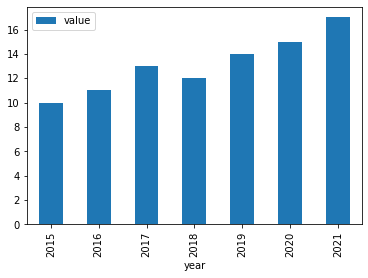

In [68]:
df.plot(
    x="year",
    y="value",
    kind="bar"
)

<AxesSubplot:ylabel='year'>

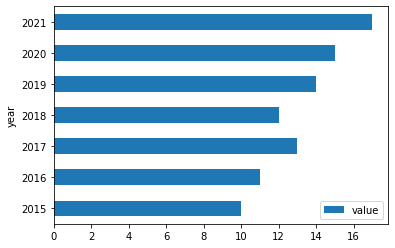

In [69]:
df.plot(
    x="year",
    y="value",
    kind="barh"
)

<AxesSubplot:>

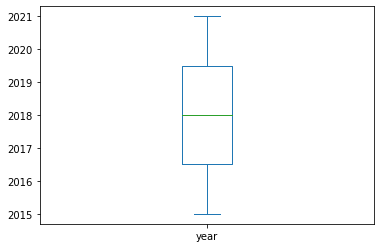

In [70]:
df.plot(
    x="value",
    kind="box"
)

<AxesSubplot:ylabel='value'>

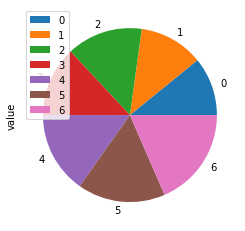

In [71]:
df.plot(
    y="value",
    kind="pie"
)

In [72]:
df = pd.DataFrame({
    "A": [5, 10, 21, 8, 15, 20],
    "B": [10, 11, 13, 12, 14, 15]
})
df

,A,B
0,5,10
1,10,11
2,21,13
3,8,12
4,15,14
5,20,15


<AxesSubplot:xlabel='A', ylabel='B'>

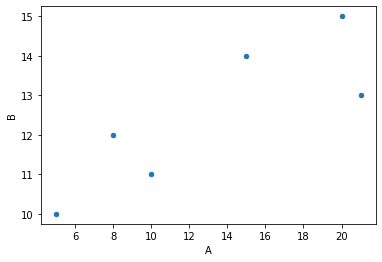

In [73]:
df.plot(
    x="A",
    y="B",
    kind="scatter"
)